In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import numpy as np

In [40]:
df_train = pd.read_csv('csv/train_sent_emo.csv', index_col=0)
df_dev = pd.read_csv('csv/dev_sent_emo.csv', index_col=0)


In [41]:
#convert utt to str
df_train['Utterance'] = df_train['Utterance'].astype(str)
df_dev['Utterance'] = df_dev['Utterance'].astype(str)

In [42]:
#Create a new column named 'image_names' in the DataFrame to store the image file names

df_train['image_names'] = df_train.apply(lambda row: f'dia{row["Dialogue_ID"]}_utt{row["Utterance_ID"]}', axis=1)
df_dev['image_names'] = df_dev.apply(lambda row: f'dia{row["Dialogue_ID"]}_utt{row["Utterance_ID"]}', axis=1)


In [43]:
import glob
import os

cwd = os.getcwd()

path_anger = cwd + '/BPI-MELD-main/BPI-MELD-main/train/train_splits_images/anger_oneface/'
path_joy = cwd + '/BPI-MELD-main/BPI-MELD-main/train/train_splits_images/joy_oneface/'
path_neutral = cwd + '/BPI-MELD-main/BPI-MELD-main/train/train_splits_images/neutral_oneface/'
path_anger_dev = cwd + '/BPI-MELD-main/BPI-MELD-main/dev/dev_splits_images/anger_oneface/'
path_joy_dev = cwd + '/BPI-MELD-main/BPI-MELD-main/dev/dev_splits_images/joy_oneface/'
path_neutral_dev = cwd + '/BPI-MELD-main/BPI-MELD-main/dev/dev_splits_images/neutral_oneface/'

files_anger = glob.glob(os.path.join(path_anger, '*.jpg'))
files_joy = glob.glob(os.path.join(path_joy, '*.jpg'))
files_neutral = glob.glob(os.path.join(path_neutral, '*.jpg'))
files_anger_dev = glob.glob(os.path.join(path_anger_dev, '*.jpg'))
files_joy_dev = glob.glob(os.path.join(path_joy_dev, '*.jpg'))
files_neutral_dev = glob.glob(os.path.join(path_neutral_dev, '*.jpg'))

files_anger = set([file.split("\x5c")[-1][:-6] for file in files_anger])
files_joy = set([file.split("\x5c")[-1][:-6] for file in files_joy])
files_neutral = set([file.split("\x5c")[-1][:-6] for file in files_neutral])
files_anger_dev = set([file.split("\x5c")[-1][:-6] for file in files_anger_dev])
files_joy_dev = set([file.split("\x5c")[-1][:-6] for file in files_joy_dev])
files_neutral_dev = set([file.split("\x5c")[-1][:-6] for file in files_neutral_dev])

all_files = files_anger.union(files_joy).union(files_neutral)
all_files_dev = files_anger_dev.union(files_joy_dev).union(files_neutral_dev)

print(len(all_files))
print(len(all_files_dev))

# all_files_train_dev = all_files.union(all_files_dev)

3375
359


In [44]:
df_train = df_train[df_train['image_names'].isin(list(all_files))]
df_dev = df_dev[df_dev['image_names'].isin(list(all_files_dev))]


In [ ]:
# df_train = df_train[df_train['Emotion'].isin(['anger', 'neutral', 'joy'])]
# df_dev = df_dev[df_dev['Emotion'].isin(['anger', 'neutral', 'joy'])]

In [45]:
df_train.Emotion.value_counts()

neutral    1460
joy        1145
anger       770
Name: Emotion, dtype: int64

In [46]:
df_dev.Emotion.value_counts()

neutral    129
anger      120
joy        110
Name: Emotion, dtype: int64

Text(0.5, 1.0, 'Distribution of Description Lengths')

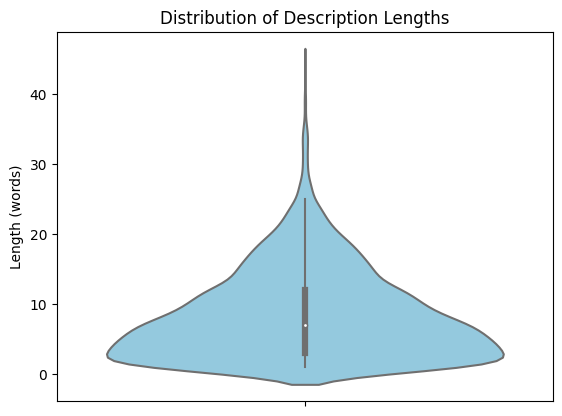

In [47]:
# Calculate the length of each comment
utt_lengths = df_train['Utterance'].str.split().apply(len)

# Plot the violin plot for comment lengths
fig = sns.violinplot(y=utt_lengths, color="skyblue")
fig.set_ylabel('Length (words)')
fig.set_title('Distribution of Description Lengths')

In [48]:
# Create stopword list:
stopwords_lst = set(STOPWORDS)

def create_word_cloud(text):
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords_lst, background_color="white").generate(text)

  # Display the generated image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

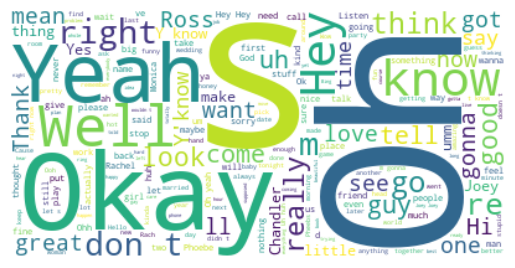

In [49]:
#Creates the concatenated_info that will be used in the word cloud below
concatenated_utt = df_train['Utterance'].str.cat(sep=' ')

create_word_cloud(concatenated_utt)

In [50]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import re
from tqdm import tqdm

lemma = WordNetLemmatizer()
nltk.download('stopwords')
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def clean(text_list, lemmatize, stem, stopwords):

    updates = []

    for j in tqdm(text_list):

        text = str(j)
        #Regular expressions:

        #LOWERCASE TEXT
        text = text.lower()
        # Remove special characters and punctuations
        text = re.sub('[^a-zA-Z0-9\s]', '', text)
        # text = re.sub("br", "", text)
        # text = re.sub("x000d", "", text)
        # text = re.sub("x000D", "", text)
        # Remove HTML tags
        # text = re.sub('<.*?>', '', text)
        # Remove extra whitespaces
        text = re.sub('\s+', ' ', text).strip()

        #REMOVE STOPWORDS
        if stopwords:

          text = " ".join([word for word in text.split() if word not in stop])

        #Lemmatize
        if lemmatize:
          text = " ".join(lemma.lemmatize(word) for word in text.split())

        #Stemming
        if stem:
          text = " ".join(stemmer.stem(word) for word in text.split() if word)


        updates.append(text)

    return updates

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
df_train['Utterance_cleaned'] = clean(df_train['Utterance'] , lemmatize=True, stem=False, stopwords=True)
df_dev['Utterance_cleaned'] = clean(df_dev['Utterance'] , lemmatize=True, stem=False, stopwords=True)


100%|██████████| 359/359 [00:00<00:00, 11486.25it/s]


## Visualizations

In [52]:
df_viz_train = df_train.copy()

In [53]:
print(df_viz_train.Speaker.value_counts().head(6))

Joey        520
Ross        505
Phoebe      456
Chandler    447
Monica      429
Rachel      424
Name: Speaker, dtype: int64


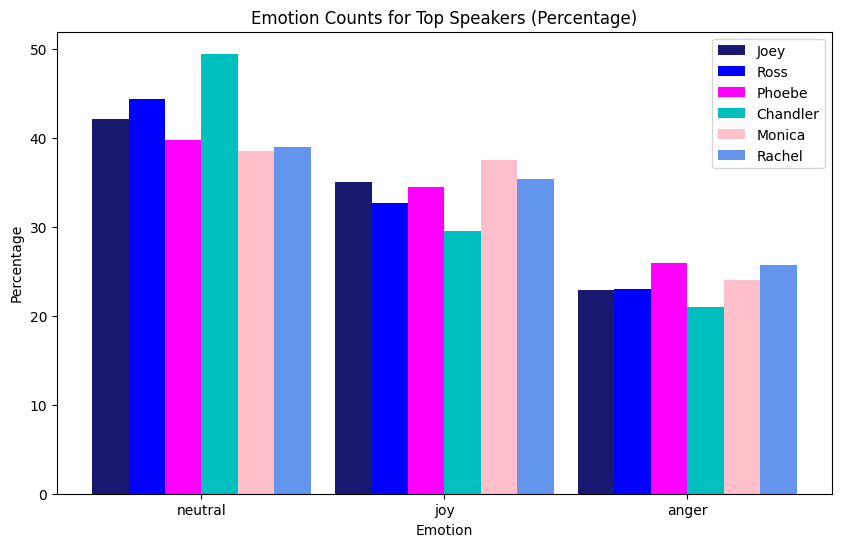

In [54]:
# Get the top N speakers
top_speakers = df_viz_train.Speaker.value_counts().head(6).index


emotions = df_viz_train['Emotion'].unique()

# Set the width of each bar
bar_width = 0.15
num_speakers = len(top_speakers)

# Generate x-axis values
x = np.arange(len(emotions))

# Create the grouped bar chart
plt.figure(figsize=(10, 6))

# Define emotions and corresponding colors
emotions = df_viz_train['Emotion'].unique()
colors = ['midnightblue', 'b', 'magenta', 'c', 'pink', 'cornflowerblue']

for i, (speaker, color) in enumerate(zip(top_speakers, colors)):
    speaker_counts = df_viz_train[df_viz_train['Speaker'] == speaker]['Emotion'].value_counts(normalize=True)
    speaker_counts = speaker_counts[emotions] * 100  # Convert to percentages
    plt.bar(x + i * bar_width, speaker_counts, bar_width, label=speaker, color=color)

# Set labels and title
plt.xlabel('Emotion')
plt.ylabel('Percentage')
plt.title('Emotion Counts for Top Speakers (Percentage)')
plt.xticks(x + bar_width * (num_speakers - 1) / 2, emotions)
plt.legend()

# Show the plot
plt.show()

In [55]:
from datetime import datetime, time


def convert_to_seconds(value):
    time_format = "%H:%M:%S,%f"  # Hours:Minutes:Seconds,Microseconds
    datetime_obj = datetime.strptime(value, time_format)
    time_obj = datetime_obj.time()
    total_seconds = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second + time_obj.microsecond / 1e6
    return total_seconds

# Parse the strings into datetime objects
df_viz_train['StartTime'] = df_viz_train['StartTime'].apply(lambda row: convert_to_seconds(row))
df_viz_train['EndTime'] = df_viz_train['EndTime'].apply(lambda row: convert_to_seconds(row))

df_viz_train['duration'] = df_viz_train['EndTime'] - df_viz_train['StartTime']


df_dev['StartTime'] = df_dev['StartTime'].apply(lambda row: convert_to_seconds(row))
df_dev['EndTime'] = df_dev['EndTime'].apply(lambda row: convert_to_seconds(row))

df_dev['duration'] = df_dev['EndTime'] - df_dev['StartTime']


In [56]:
#Check if some data were wrong and returned a negative duration
df_viz_train[df_viz_train['duration']<0]

,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,image_names,Utterance_cleaned,duration
Sr No.,,,,,,,,,,,,,


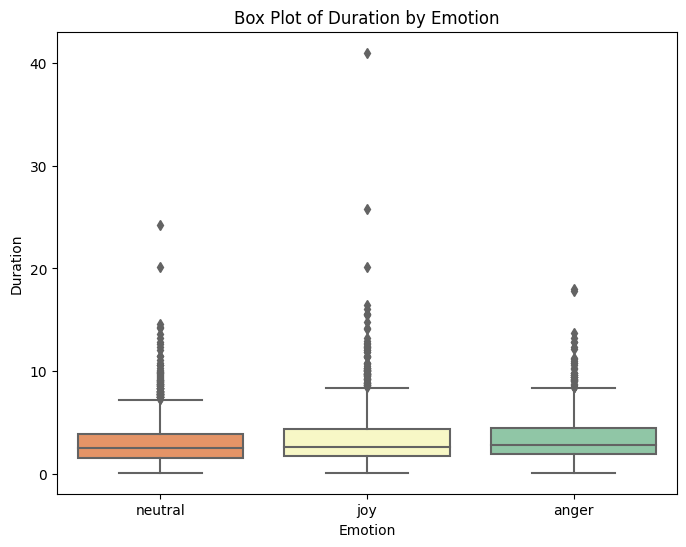

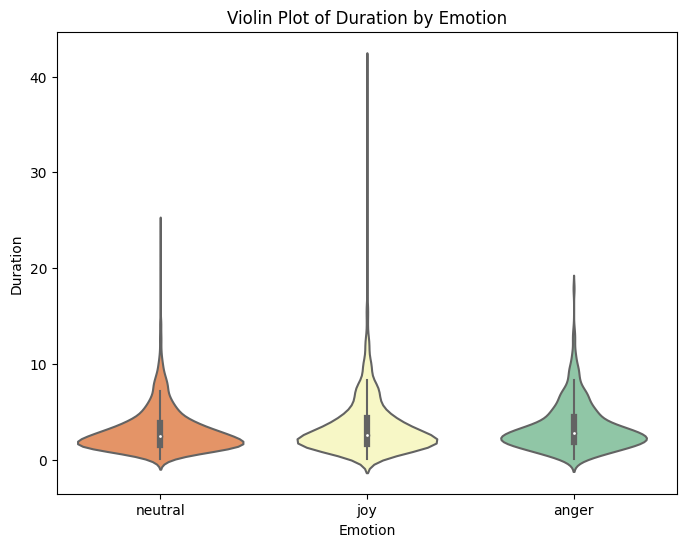

C:\Users\henri\AppData\Local\Temp\ipykernel_2972\630937991.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Emotion', y='duration', data=df_viz_train, ci=None, palette='Spectral')


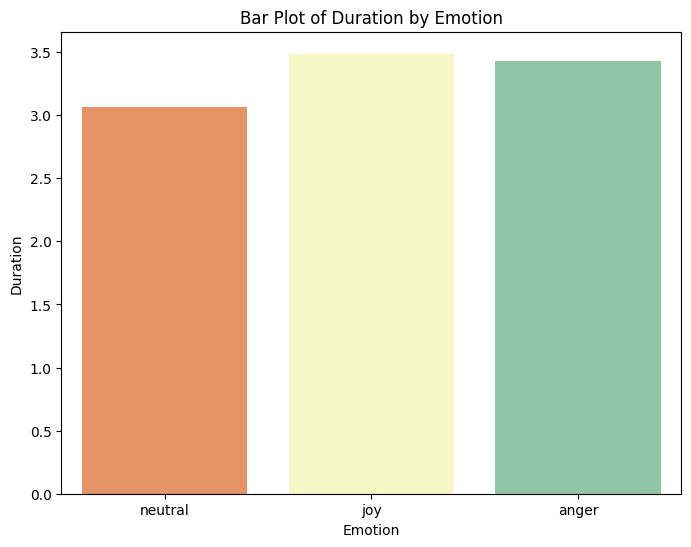

In [57]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Emotion', y='duration', data=df_viz_train, palette='Spectral')
plt.title('Box Plot of Duration by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Duration')
plt.show()

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Emotion', y='duration', data=df_viz_train, palette='Spectral')
plt.title('Violin Plot of Duration by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Duration')
plt.show()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Emotion', y='duration', data=df_viz_train, ci=None, palette='Spectral')
plt.title('Bar Plot of Duration by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Duration')
plt.show()

In [58]:
from scipy.stats import kruskal

emotions = df_viz_train['Emotion'].unique()
data = [df_viz_train[df_viz_train['Emotion'] == emotion]['duration'] for emotion in emotions]

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*data)

if p_value < 0.05:
    print("Kruskal-Wallis: There is a statistically significant difference between groups.")
    print(f"p-value: {p_value}")
else:
    print("Kruskal-Wallis: There is no statistically significant difference between groups.")
    print(f"p-value: {p_value}")

Kruskal-Wallis: There is a statistically significant difference between groups.
p-value: 9.182245218250521e-05


C:\Users\henri\AppData\Local\Temp\ipykernel_2972\1703309868.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=melted_data, x='Season', y='Percentage', hue='Emotion', ci=None)


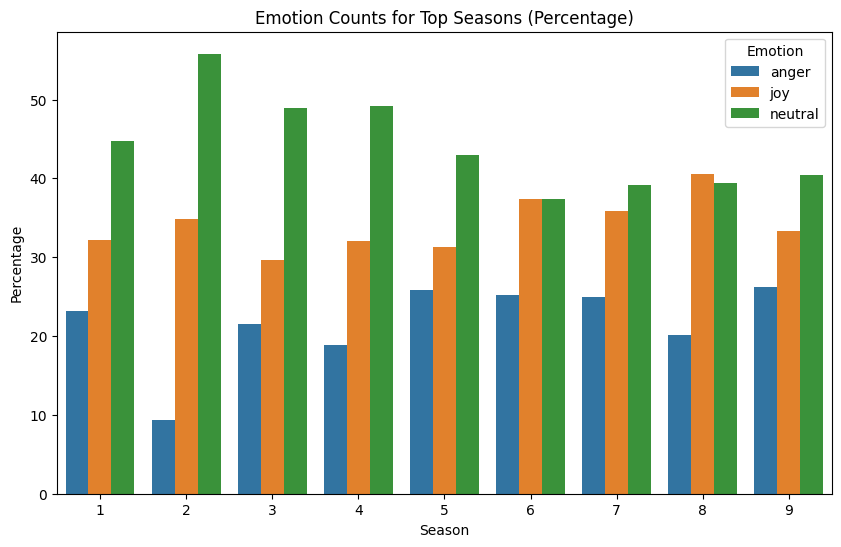

In [59]:

# Sort the DataFrame by the 'Season' column in ascending order
df_viz_sorted = df_viz_train.sort_values(by='Season')

# Get the top N seasons
top_seasons = df_viz_sorted['Season'].value_counts().index

# Filter the data for the top seasons
filtered_data = df_viz_sorted[df_viz_sorted['Season'].isin(top_seasons)]

# Calculate percentage values for each emotion within each season
percentage_data = filtered_data.groupby(['Season', 'Emotion']).size().unstack(fill_value=0).apply(lambda x: x / x.sum() * 100, axis=1)

# Reshape the data using the 'melt' function
melted_data = percentage_data.reset_index().melt(id_vars='Season', var_name='Emotion', value_name='Percentage')

# Set the width of each bar
bar_width = 0.15

# Specify the order of seasons
season_order = range(1, 9)

# Create the grouped bar chart with Seaborn
plt.figure(figsize=(10, 6))
# sns.set_order(season_order)
ax = sns.barplot(data=melted_data, x='Season', y='Percentage', hue='Emotion', ci=None)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('Emotion Counts for Top Seasons (Percentage)')

# Show the plot
plt.legend(title='Emotion')
plt.show()

## TF-IDF


In [60]:
df_train['duration'] = df_viz_train['duration']


df_tf_idf = df_train.copy()

df_tf_idf_dev = df_dev.copy()



In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer


def apply_tf_idf(data, data_dev):

  # Combine the text columns into a single column
  data['text'] = data['Utterance_cleaned']
  data_dev['text'] = data_dev['Utterance_cleaned']

  # Create an instance of TfidfVectorizer
  tfidf_vectorizer = TfidfVectorizer()

  # Fit and transform the text data
  tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

  tfidf_matrix_dev = tfidf_vectorizer.transform(data_dev['text'])

  # Convert the TF-IDF matrix to a DataFrame
  tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[feature_name for feature_name in tfidf_vectorizer.get_feature_names_out()])
  # tfidf_df = pd.DataFrame(tfidf_matrix[0].T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["TF-IDF"])

  tfidf_df_dev = pd.DataFrame(tfidf_matrix_dev.toarray(), columns=[feature_name for feature_name in tfidf_vectorizer.get_feature_names_out()])

  # Remove the 'text' column from the original DataFrame
  data.drop('text', axis=1, inplace=True)
  data_dev.drop('text', axis=1, inplace=True)

  # Concatenate the original DataFrame with the TF-IDF DataFrame
  data = pd.concat([data.reset_index(drop=True), tfidf_df], axis=1)
  data_dev = pd.concat([data_dev.reset_index(drop=True), tfidf_df_dev], axis=1)
  return data, data_dev

In [62]:
df_tf_idf = apply_tf_idf(df_tf_idf, df_tf_idf_dev)[0]

df_tf_idf_dev = apply_tf_idf(df_tf_idf, df_tf_idf_dev)[1]

In [63]:
df_tf_idf.head(2)

,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,...,youwhat,youyou,youyouyou,yowza,ysee,ythink,yuhhuh,yummy,zana,zoo
0,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
drop_columns = ['Season', 'duration', 'StartTime', 'EndTime', 'Episode', 'Dialogue_ID', 'Utterance_ID', 'Utterance', 'Speaker', 'Utterance_cleaned', 'Sentiment']
df_tf_idf.drop(columns=drop_columns, inplace=True)
df_tf_idf_dev.drop(columns=drop_columns, inplace=True)

# #Convert Sentiment to int
# dict_sentiment = {'neutral':0, 'positive':1, 'negative':2}
# df_tf_idf['Sentiment'] = df_tf_idf['Sentiment'].map(dict_sentiment)
# df_tf_idf_dev['Sentiment'] = df_tf_idf_dev['Sentiment'].map(dict_sentiment)

In [65]:
df_tf_idf.head()

,Emotion,image_names,10,1000,123go,15,16hour,17,18,19,...,youwhat,youyou,youyouyou,yowza,ysee,ythink,yuhhuh,yummy,zana,zoo
0,neutral,dia0_utt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,neutral,dia0_utt1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,neutral,dia0_utt2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,neutral,dia0_utt3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,neutral,dia0_utt5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Models using TF-IDF

In [66]:
from sklearn.model_selection import train_test_split

y_train = df_tf_idf['Emotion']
y_test = df_tf_idf_dev['Emotion']

#save image_names to use latter
image_names = df_tf_idf['image_names']
image_names_dev = df_tf_idf_dev['image_names']

df_tf_idf.drop(columns=['Emotion', 'image_names'], inplace=True)
df_tf_idf_dev.drop(columns=['Emotion', 'image_names'], inplace=True)

X_train = df_tf_idf.copy()
X_test = df_tf_idf_dev.copy()

# X_train, X_test, y_train, y_test = train_test_split(df_tf_idf.drop(columns=['Emotion', 'image_names']), target, test_size=0.2, random_state=42)

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def get_metrics(model, train_df, test_df):
  # Make predictions on the training set
  y_train_pred = model.predict(train_df)

  # Calculate metrics for the training set
  train_accuracy = accuracy_score(y_train, y_train_pred)
  train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
  train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=1)
  train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=1)

  # Make predictions on the test set
  y_test_pred = model.predict(test_df)

  # Calculate metrics for the test set
  test_accuracy = accuracy_score(y_test, y_test_pred)
  test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)
  test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=1)
  test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=1)

  # Print the metrics for both sets
  print("Training Set:")
  print("Accuracy:", train_accuracy)
  print("Precision:", train_precision)
  print("Recall:", train_recall)
  print("F1-Score:", train_f1)

  print("Test Set:")
  print("Accuracy:", test_accuracy)
  print("Precision:", test_precision)
  print("Recall:", test_recall)
  print("F1-Score:", test_f1)

  print(classification_report(y_test, y_test_pred))

In [68]:
from sklearn.neighbors import KNeighborsClassifier

modelknn2 = KNeighborsClassifier(n_neighbors = 25, metric = 'cosine', weights = 'uniform')
modelknn2.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=25)

In [69]:
get_metrics(modelknn2, X_train, X_test)

Training Set:
Accuracy: 0.528
Precision: 0.5298661328080969
Recall: 0.528
F1-Score: 0.5122252330328606
Test Set:
Accuracy: 0.40947075208913647
Precision: 0.43545239492153204
Recall: 0.40947075208913647
F1-Score: 0.3883109788012987
              precision    recall  f1-score   support

       anger       0.51      0.17      0.26       120
         joy       0.41      0.50      0.45       110
     neutral       0.39      0.55      0.46       129

    accuracy                           0.41       359
   macro avg       0.44      0.41      0.39       359
weighted avg       0.44      0.41      0.39       359



In [70]:
y_pred = modelknn2.predict(X_test)

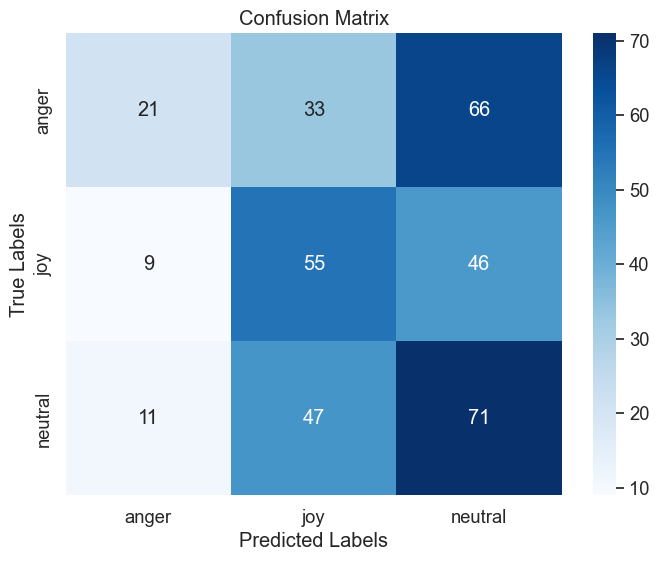

In [71]:
from sklearn.metrics import confusion_matrix
classes = ['anger', 'joy', 'neutral']
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta o tamanho da fonte para tornar o gráfico mais legível
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [25, 30, 35],  # List of different values for n_neighbors
    'weights': ['uniform', 'distance'],  # Options for the weights parameter
    'metric': ['euclidean', 'manhattan', 'cosine'],  # Different distance metrics to try
}

# Create the KNN model
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)  # You can adjust the number of cross-validation folds (cv)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model with the optimal hyperparameters
best_knn = grid_search.best_estimator_

Best hyperparameters: {'metric': 'cosine', 'n_neighbors': 35, 'weights': 'distance'}


In [237]:
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [238]:
get_metrics(svm_classifier, X_train, X_test)

Training Set:
Accuracy: 0.4441481481481481
Precision: 0.576108609888661
Recall: 0.4441481481481481
F1-Score: 0.31402377945213994
Test Set:
Accuracy: 0.3732590529247911
Precision: 0.35538374220224395
Recall: 0.3732590529247911
F1-Score: 0.3191155628637149
              precision    recall  f1-score   support

       anger       0.33      0.07      0.11       120
         joy       0.33      0.32      0.32       110
     neutral       0.40      0.71      0.51       129

    accuracy                           0.37       359
   macro avg       0.35      0.36      0.31       359
weighted avg       0.36      0.37      0.32       359



In [324]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your data and labels loaded into X and y


# Define individual models
model1 = MultinomialNB()
model2 = LogisticRegression()
model3 = SVC(kernel='linear', probability=True)

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('nb', model1),
    ('lr', model2),
    ('svm', model3)
], voting='soft')  # Use 'soft' voting to get probabilities

# Fit the ensemble model on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy * 100:.2f}%')


Ensemble Model Accuracy: 46.24%


In [328]:
get_metrics(voting_classifier, X_train, X_test)

Training Set:
Accuracy: 0.8805925925925926
Precision: 0.8891970003249682
Recall: 0.8805925925925926
F1-Score: 0.8787278835835256
Test Set:
Accuracy: 0.4623955431754875
Precision: 0.5132803101038004
Recall: 0.4623955431754875
F1-Score: 0.42540751152954004
              precision    recall  f1-score   support

       anger       0.61      0.14      0.23       120
         joy       0.53      0.53      0.53       110
     neutral       0.41      0.71      0.52       129

    accuracy                           0.46       359
   macro avg       0.52      0.46      0.43       359
weighted avg       0.51      0.46      0.43       359



## GloVe

In [273]:
drop_columns = ['StartTime', 'EndTime', 'Episode', 'Dialogue_ID', 'Utterance_ID', 'Utterance', 'Speaker', 'Utterance_cleaned', 'Sentiment']

In [274]:
df_glove = df_train.copy()
df_glove_dev = df_dev.copy()

In [281]:
# import numpy as np
import nltk
import torchtext.vocab as vocab

# Load the pretrained GloVe word vectors
# glove = vocab.Vectors('path/to/your/glove.6B.50d.txt', cache='./glove')

glove = vocab.GloVe(name='6B', dim=50)

# Function to tokenize and apply GloVe embeddings
def apply_glove_embeddings(text):
    tokens = nltk.word_tokenize(text)
    embeddings = [glove[token.lower()].numpy() for token in tokens if token.lower() in glove.stoi]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(50)  # Use zero vector for out-of-vocabulary words

# Apply the GloVe embeddings to the 'Utterance_cleaned' column
df_train['GloVe_Embeddings'] = df_train['Utterance_cleaned'].apply(apply_glove_embeddings)

.vector_cache\glove.6B.zip: 0.00B [00:00, ?B/s]

.vector_cache\glove.6B.zip: 862MB [12:01, 1.19MB/s]                               
100%|█████████▉| 399999/400000 [00:33<00:00, 12023.97it/s]
